## **ALTSCHOOL FIRST SEMESTER EXAM PROJECT: CAREER ATLAS INC.**

### *Task: Clean and analyze a dataset containing job salary details to support a reliable salary trend report*

In [6]:
# TASK 1 - CLEAN AND VALIDATE THE SALARY  DATASET

# Import necessary package
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Pick the dataset: salary_data
salary_data = 'ds_salaries_dirty.csv'

# Load the dataset into a dataframe: salary_df
salary_df = pd.read_csv(salary_data)

# View the first 5 rows
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183.0,50,IN,L
1,2023,MI,FL,Data Scientist,190371.0,100,IN,S
2,2020,MI,CT,DS,173946.0,50,IN,L
3,2022,NaN,FT,ML Engineer,146336.0,50,DE,S
4,2022,MI,FL,ML Engineer,9999999.0,100,NG,L


In [10]:
# Check the dimension of the dataset : 
salary_df.shape # SHOWS 100 ENTRIES and 8 features excluding the index column


(100, 8)

In [12]:
# Check the column names
salary_df.columns # There are no redundant features


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [14]:
# STEP 1: Inspect the data and identify the missing values

# Are there duplicates?
salary_df.duplicated().sum()

0

In [20]:
# Check the dataset general information
salary_df.info()

# Observed some missingness in the data, but the datatypes are all fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         100 non-null    int64  
 1   experience_level  90 non-null     object 
 2   employment_type   92 non-null     object 
 3   job_title         100 non-null    object 
 4   salary_in_usd     96 non-null     float64
 5   remote_ratio      100 non-null    int64  
 6   company_location  94 non-null     object 
 7   company_size      100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [22]:
# Check missingness in the columns: WHERE ARE THE MISSING VALUES?
salary_df.isna().sum()

work_year            0
experience_level    10
employment_type      8
job_title            0
salary_in_usd        4
remote_ratio         0
company_location     6
company_size         0
dtype: int64

In [24]:
# STEP 2: Check Summary Statistics for columns with missing values

# Check the summary statistics of the experience level column
salary_df['experience_level'].describe()

count     90
unique     4
top       SE
freq      28
Name: experience_level, dtype: object

In [26]:
# Check the summary statistics of the employment type column
salary_df['employment_type'].describe()

count     92
unique     4
top       FT
freq      25
Name: employment_type, dtype: object

In [28]:
# Check the summary statistics of the company location column
salary_df['company_location'].describe()

count     94
unique     5
top       IN
freq      24
Name: company_location, dtype: object

In [30]:
# Display the summary statistics of the salary in USD feature and format to show in easily readable format
pd.options.display.float_format = '{:.0f}'.format

salary_df['salary_in_usd'].describe()

count        96
mean     299482
std     1118097
min          50
25%       95096
50%      156257
75%      202994
max     9999999
Name: salary_in_usd, dtype: float64

In [38]:
# Calculate the median of the salary: This is also the 50th percentile
salary_median = salary_df.salary_in_usd.median()

# Display the value for the median salary with appropriate formatting
print('The Median value for the salaries in the dataset is: ${:,.0f}'.format(salary_median))

The Median value for the salaries in the dataset is: $156,257


#### **Discussing the missingness in the data**

- The experience level column shows the highest number of missing values which is equivalent of 10% of our entries. Because of this, we will have to perform some data inputation to avoid lossing that potion of the data. Since this data is categorical and ordinal in nature, it would be safe to fill the missing values with the lowest level of experience.
  
- The employment type also has 8% missingness. This value is observed to be categorical and nominal. The summary statistics shows that there are 4 unique values and the most occurred is FT likely an accronym for **FULL-TIME**. As a result we will be replacing the missing values with FT.

- The company location has 6 missing values. Although this data is categorical and nominal, we will be filling the missing values with US. This is as per the directive from *Career Atlas Inc representation* who was the source of the data.

- The column with the least number of missing values is the Salary in US Dollars. Here, there are 4 missing values and since it is a numerical data, we will simply fill the missing values with the median.

In [43]:
# STEP 3: Before replacing the missing values, check for consistency in the data entries in each column with missing values

# Experience level shows 4 unique entries
salary_df['experience_level'].value_counts()

experience_level
SE    28
EN    23
EX    21
MI    18
Name: count, dtype: int64

In [45]:
# Employment type shows 4 unique entries
salary_df['employment_type'].value_counts()

employment_type
FT    25
FL    24
CT    22
PT    21
Name: count, dtype: int64

In [47]:
# Experience level shows 5 unique entries
salary_df['company_location'].value_counts()

company_location
IN    24
GB    22
NG    18
US    17
DE    13
Name: count, dtype: int64

In [49]:
# STEP 4: Tackle the missing values

# Make a copy of the dataset as reserve before filling missing values
salary_df_reserved = salary_df.copy()

salary_df_reserved.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183,50,IN,L
1,2023,MI,FL,Data Scientist,190371,100,IN,S
2,2020,MI,CT,DS,173946,50,IN,L
3,2022,NaN,FT,ML Engineer,146336,50,DE,S
4,2022,MI,FL,ML Engineer,9999999,100,NG,L


In [85]:
# Create a Function to check if missing values have been filled successfully
def missing_values_filled(check):
    '''This function takes an argument that is an integer and checks if the value is equal to 0.
        It displays successful for True and unsuccessful for False.'''
    
    if check == 0:
        print('Missing values have been filled successfully\n')
    else:
        print('Missing values are still present in this column, please try again\n')

In [59]:
# Fill the missing values in the experience level column
salary_df['experience_level'].fillna('EN', inplace=True)

# Check if the fill was correctedly done
check = salary_df.experience_level.isna().sum()
missing_values_filled(check)

Missing values have been filled successfully



In [65]:
# Fill the missing values in the employment type column
salary_df['employment_type'].fillna('FT', inplace=True)

# Check if fill was correctedly done
check = salary_df.employment_type.isna().sum()
missing_values_filled(check)

Missing values have been filled successfully



In [69]:
# Fill the missing values in the company location column
salary_df['company_location'].fillna('US', inplace=True)

# Check if fill was correctedly done
check = salary_df.company_location.isna().sum()
missing_values_filled(check)

Missing values have been filled successfully



In [77]:
# Fill the missing values in the salary column with the salary_median
salary_df['salary_in_usd'].fillna(salary_median, inplace=True)

# Check if fill was correctedly done
check = salary_df.salary_in_usd.isna().sum()
missing_values_filled(check)

Missing values have been filled successfully



C:\Users\USER\AppData\Local\Temp\ipykernel_4740\199110469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salary_df['salary_in_usd'].fillna(salary_median, inplace=True)


In [79]:
# Check if there are any missing data
salary_df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

In [81]:
# STEP 5: Check data Consistency in the Job title column

# Check if all entries are valid
salary_df['job_title'].value_counts()

job_title
AI Specialist     32
Data Analyst      24
Data Scientist    21
ML Engineer       18
DS                 5
Name: count, dtype: int64

In [91]:
# DS could either be Data Scientist or something else, but since we cannot be sure, we will drop them 
salary_df = salary_df[salary_df['job_title'] != 'DS']

salary_df.shape # This shows that we have now lost 5 observations which is 5% of our dataset

(95, 8)

##### STEP 6: *Identifying and dealing with Outliers in the Salary Column*

- For this case, the assumption is that an outlier is any value that is less than USD10,000 or greater than USD1,000,000
  
- These outliers will be replaced with the Salary median value

<Axes: >

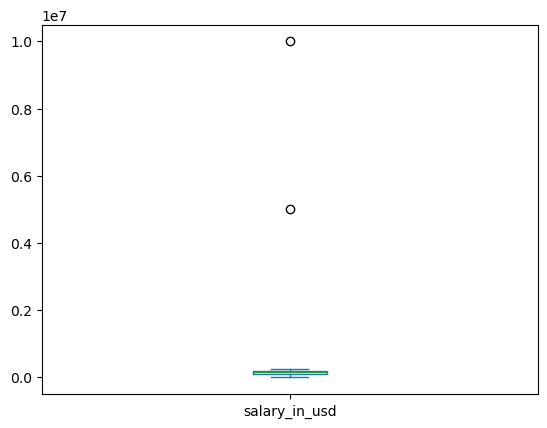

In [98]:
# First, Make a simple box plot to see how the values are spread
salary_df['salary_in_usd'].plot(kind='box') # The outliers are clearly shown here

In [100]:
# How many values are below the lower limit: less than 10,000
(salary_df['salary_in_usd'] <= 10000).sum()


1

In [104]:
# How many values are greater than the upper limit: greater than 1,000,000
(salary_df['salary_in_usd'] >= 1000000).sum()

2

In [108]:
# Handling the 1 value below the lower limit: Replace the value less than 10000 with median value
salary_df['salary_in_usd'] = salary_df['salary_in_usd'].where(salary_df['salary_in_usd'] >10000, salary_median)

In [110]:
# Handling the 2 value over the higher limit: Replace values greater than 1000000 with median value
salary_df['salary_in_usd'] = salary_df['salary_in_usd'].where(salary_df['salary_in_usd'] <1000000, salary_median)

##### STEP 7: *Save the cleaned data for further analysis*

Now that all the missing values, outliers and other inconsistencies have been handled, we will save the cleaned and validated dataframe as clean_salaries

In [117]:
# Save the clean copy
clean_salaries = salary_df.copy()

In [115]:
# Check the first 10 rows of the cleaned data
clean_salaries.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183,50,IN,L
1,2023,MI,FL,Data Scientist,190371,100,IN,S
3,2022,EN,FT,ML Engineer,146336,50,DE,S
4,2022,MI,FL,ML Engineer,156257,100,NG,L
5,2023,MI,FT,Data Scientist,35539,50,GB,S
6,2020,EN,FL,AI Specialist,214423,100,DE,XL
7,2020,EX,FL,ML Engineer,222339,50,IN,S
9,2021,SE,FT,ML Engineer,156257,100,IN,M
10,2022,EX,CT,AI Specialist,163629,50,US,S
11,2022,SE,CT,Data Analyst,68360,50,IN,M


In [119]:
# Crosscheck for missingness
clean_salaries.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

In [121]:
# Check the summary statistics
clean_salaries.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
count,95,95,95,95,95,95,95,95
unique,NaN,4,4,4,NaN,NaN,5,4
top,NaN,EN,FT,AI Specialist,NaN,NaN,IN,S
freq,NaN,33,32,32,NaN,NaN,23,35
mean,2022,NaN,NaN,NaN,146320,51,NaN,NaN
std,1,NaN,NaN,NaN,59196,38,NaN,NaN
min,2020,NaN,NaN,NaN,32869,0,NaN,NaN
25%,2021,NaN,NaN,NaN,97998,0,NaN,NaN
50%,2022,NaN,NaN,NaN,156257,50,NaN,NaN
75%,2023,NaN,NaN,NaN,193762,100,NaN,NaN


### *NOTES*

- Only 5% of data was lost during cleaning
- The inconsistencies in Job Title reported was the reason for this lost data
- The report covered records from 4 years starting in 2020 and ending in 2023
- Most popular employment type was **FT** - Full Time, and AI Specailist was the top role in the dataset
- Most of the companies were Small scale businesses

*Adjustment made*
- Missing values in the experience level column were replaced with **'EN'**
- Missing values in the employment type column were replaced with **'FT'**
- Missing values in the company location column were replaced with **'US'**
- Missing values in the salary columnn were replaced with The Median Value which is **156,257 US Dollars** per annum
- Any Salary value less than **10,000 US Dollars** or higher than **1,000,000 US Dollars** was considered to be an outlier and was replace with the Median Value

*Assumptions*

We will be using the following assumptions going forward with the analysis
1. EN = Entry-Level
2. MI = Mid-Level
3. SE = Senior-Level
4. EX = Executive-Level
5. FT = Full-Time
6. PT = Part-Time
7. CT = Contract
8. FL = Freelance

#### **TASK 2: SALARY TREND BY EXPERIENCE**
Here, we will investigate how experience level affects average salary across employment types

In [135]:
# STEP 1: Group by 2 columns - experience level and employment type
group_1 = clean_salaries.groupby(['experience_level', 'employment_type'])

# Display the result
group_1.size()

experience_level  employment_type
EN                CT                  5
                  FL                 12
                  FT                  9
                  PT                  7
EX                CT                  5
                  FL                  4
                  FT                  8
                  PT                  2
MI                CT                  4
                  FL                  4
                  FT                  4
                  PT                  4
SE                CT                  6
                  FL                  4
                  FT                 11
                  PT                  6
dtype: int64

#### *Observations*

+ At every experience level (EN, MI, SE, EX), we find significant full-time representation. This is most prominent in Senior-Level with 11 occurrences and Entry with 9 occurrences. This suggests that full-time employment remains the standard engagement type, regardless of experience level.

+ Entry-level roles are most spread across all four employment types, with freelance having the single highest representation in the dataset. Since entry-levels are junior talents, this might indicate two things:
  1. Employers are experimenting more with flexible, short-term, or freelance arrangements for junior talents, or
  2. There are higher volume of entry-level roles overall, which is common in scalable teams or internships and is the case here in the dataset.

+ Executives have fewer freelance 4 and Part-Time 2 occurrences, they tend to lean more toward Full-Time and less Freelance. This implies executive roles are more formalized, high-stakes, and less likely to be part-time or project-based.

+ Senior roles appear to be balanced but FT-inclined, with 11 occurrences in full-time and fair distribution of 6 occurrences in Contract and Part-Time also. This indicates that, some senior experts are also working in flexible leadership capacities.

+ Mid-Level shows a perfectly even split; *safe to say that mid-levels are everywhere*. Each employment type has exactly 4 occurrences for mid-level experience. Might suggest that mid-level professionals are highly adaptable or in demand across all work modes.

In [469]:
# STEP 2: Compute the average salary in usd across the group
clean_salaries.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean()

experience_level  employment_type
EN                CT                 92872
                  FL                160093
                  FT                132981
                  PT                165242
EX                CT                166817
                  FL                163361
                  FT                175003
                  PT                112362
MI                CT                170697
                  FL                128970
                  FT                116324
                  PT                131638
SE                CT                127804
                  FL                129453
                  FT                140822
                  PT                170818
Name: salary_in_usd, dtype: float64

In [141]:
# STEP 3: Save the new group as a dataframe named: salary_trend
salary_trends = clean_salaries.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Show the resulting dataframe
salary_trends

,experience_level,employment_type,salary_in_usd
0,EN,CT,92872
1,EN,FL,160093
2,EN,FT,132981
3,EN,PT,165242
4,EX,CT,166817
5,EX,FL,163361
6,EX,FT,175003
7,EX,PT,112362
8,MI,CT,170697
9,MI,FL,128970


In [143]:
# STEP 4: Pivot the dataframe to better show the variations in average salary for the groups in a matrix format
salary_trends_pivot = salary_trends.pivot(index='experience_level', columns='employment_type', values='salary_in_usd')

# To display the result
salary_trends_pivot

employment_type,CT,FL,FT,PT
experience_level,,,,
EN,92872,160093,132981,165242
EX,166817,163361,175003,112362
MI,170697,128970,116324,131638
SE,127804,129453,140822,170818


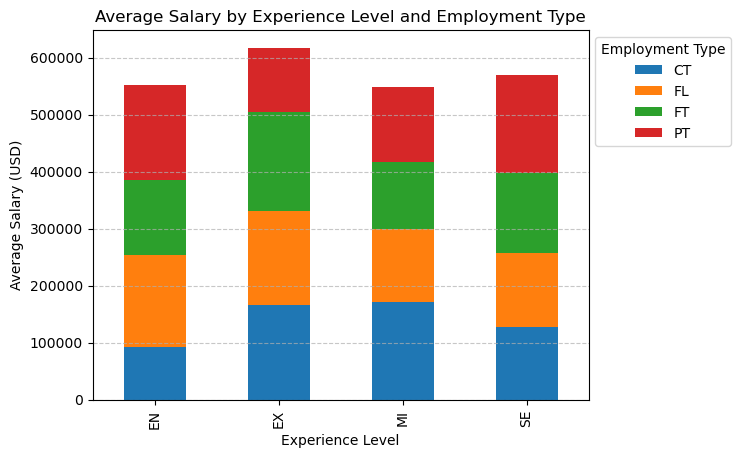

In [150]:
# STEP 5: Plot the stacked bar chart
salary_trends_pivot.plot(kind='bar', stacked=True)

# Add axis labels, titles and legend
plt.title('Average Salary by Experience Level and Employment Type')
plt.xlabel('Experience Level') # Horizontal axis label
plt.ylabel('Average Salary (USD)') # Vertical axis label
plt.legend(title='Employment Type', bbox_to_anchor=(1, 1), loc='upper left') # Adjust the legend to display outside of the plot within the figure
plt.grid(axis='y', linestyle='--', alpha=0.7) # Show Horizontal grid line on the y axis for easy matching of data points

# Show plot
plt.show()

### *Findings*

+ FT salaries increase with seniority, peaking at *175,003 dollars* for Executives. However, we notice a dip at Mid-level, which is possibly due to under-leveled roles or under-compensation.
+ Surprisingly, Entry-level Part-Time roles have the highest average of all EN roles: *165,242 dollars*, even higher than FT. But the least lucrative role is Entry-level on Contract with an average of less than *100,000 dollars per annum*.
+ Senior Part-Time roles also lead at *170,818 dollars*, beating FT and other modes.
+ Freelance and Contract work pays competitively across all levels, often matching or exceeding full-time.
+ For executive, contract & freelance work pays very well. Contract paying *166,817 dollars* and Freelance paying *163,361 dollars* on average for Executives rival full-time rates. This shows that fractional executive roles like interim CTOs and consultants are in high demand and also well-paid.
+ Another surprising find is that: Mid-level contract workers earn *170,697 dollars* on average annually, which is the second-highest salary across the entire table. This might mean that there is a growing trend of mid-career professionals, who are contracting out their specialized skills instead of taking full-time roles.

### **TASK 3: Remote Work Analysis**
#### *Target: Analyze and discuss the effect of remote work on salaries*

##### Step Taken: 
1. Subset the clean dataframe to get the data for fully remote and fully on-site staff, discarding the hybrid workers.
2. Calculate the average salaries in USD for each subset.
3. Present the result in a new Dataframe
4. Plot a simply chart to show the result and discuss findings
5. Calculate the salary difference in percentage

In [158]:
# STEP 1a: Subset the dataframe to include only information for ONSITE roles; where remote ratio is 0
onsite_df = clean_salaries[clean_salaries['remote_ratio'] == 0]


In [160]:
# STEP 1b: Subset the dataframe to include only information for REMOTE roles; where remote ratio is 100
remote_df = clean_salaries[clean_salaries['remote_ratio'] == 100]


In [168]:
# STEP 2: Calculate average salaries for each subset and save in a unique variable
remote_avg_salary = remote_df['salary_in_usd'].mean() # Average value of salary for remote workers

# Display the value for average remote salary
print('This is the value for the average salary for fully remote roles: ${:,.0f}\n'.format(remote_avg_salary))

onsite_avg_salary = onsite_df['salary_in_usd'].mean() # Average value of salary for on-site workers

# Display the value for average on-site salary
print('This is the value for the average salary for fully on-site roles: ${:,.0f}\n'.format(onsite_avg_salary))

This is the value for the average salary for fully remote roles: $145,306

This is the value for the average salary for fully on-site roles: $153,439



In [206]:
# STEP 3: Create a dictionary with the remote ratio salary data and from it create a DataFrame
remote_ratio_salary_data = {
                    'Work Mode': ['On-site', 'Remove'],
                    'Average Salary USD': [onsite_avg_salary, remote_avg_salary]
                    }

# Create a dataframe from the dictionary
remote_salary_comparison = pd.DataFrame(remote_ratio_salary_data)


In [208]:
# STEP 4a: Show the result
remote_salary_comparison


,Work Mode,Average Salary USD
0,On-site,153439
1,Remove,145306


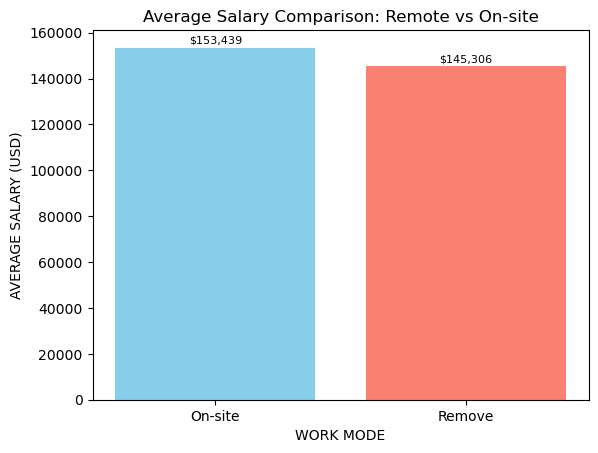

In [210]:
# STEP 4b: Plot a bar chart to show the data, set the color to skyblue and salmon
plt.bar(remote_salary_comparison['Work Mode'], remote_salary_comparison['Average Salary USD'], 
        color=['skyblue', 'salmon'])

# Add labels to the axes and title
plt.title('Average Salary Comparison: Remote vs On-site')
plt.ylabel('AVERAGE SALARY (USD)')
plt.xlabel('WORK MODE')

# Add exact values to the bars and format to show as amount in USD
for i, val in enumerate(remote_salary_comparison['Average Salary USD']):
    plt.text(i, val + 1000, f'${val:,.0f}', ha='center', va='bottom', fontsize=8)

plt.show()

In [212]:
# STEP 5: Calculate the difference in percentage

# Difference between the Remote and On-site
salary_diff = remote_salary_comparison['Average Salary USD'].iloc[0] - remote_salary_comparison['Average Salary USD'].iloc[1]

# Calculate the percentage difference
percent_diff = (salary_diff / remote_salary_comparison['Average Salary USD'].iloc[0]) * 100

# Round up the value to 1 decimal place
per_more = percent_diff.round(1)

# display the result
print('On-site roles earn {}% more than Remote roles on average.\n'.format(per_more))

On-site roles earn 5.3% more than Remote roles on average.



### *FINDINGS*

1. The above plot shows a slight difference in the average salary earned for remote and on-site roles. It shows that On-site staffs earns an average of *USD 153,000* per annum, which is around 5.3% more than their remote counterparts who earns an average of *USD 145,000* per annum.

2. Contrary to common assumptions, the average salary for Remote roles is lower than that of On-site roles in this dataset. This could be due to a few reasons:
    - Remote roles may be distributed across lower-cost regions, where companies adjust pay accordingly.
    - There might be more senior or technical roles still on-site, which drive up the average.
    - As remote work scales globally, many companies are now hiring more volume but at slightly lower pay points.
      

3. On the other hand, remote staff might earn less because their salaries would not factor certain components that on-site staff may benefit from, such as, *Transportation allowance*. And in some cases, the common practice of not making allowance for taxes for remote workers, especially those working from another country.

4. From the employer's side of things, having more staff work remotely, can help the business to save considerable funds from overhead spending. Since they can save 5.6% from salaries alone and possibly also reduce cost of running an office on-site.